# Regression notebook_

In [ ]:
# <ins> A. Task definition and general information </ins> 

## Regression task - Predict

## general knowledge:

### About the dataset:
This dataset contains information about used cars listed on www.cardekho.com, the columns in the given dataset is as follows:

- Car_Name
- Year
- Selling_Price
- Present_Price
- Kms_Driven
- Fuel_Type
- Seller_Type
- Transmission
- Owner

# <ins> B. Basic familiarity with the Datast </ins>

## attributes information

### imports

In [437]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')

In [438]:
df = pd.read_csv("car_data.csv")
df.rename(columns = {'Owner':'Past_Owners'},inplace = True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


<br>
let's take a look at the attributes categories:

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Past_Owners    301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [440]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Past_Owners      False
dtype: bool

### basic infromation of all the data:

In [441]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### basic infromation of data:

### let's take a look at the numeric attributes histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020834F54460>,
      dtype=object)

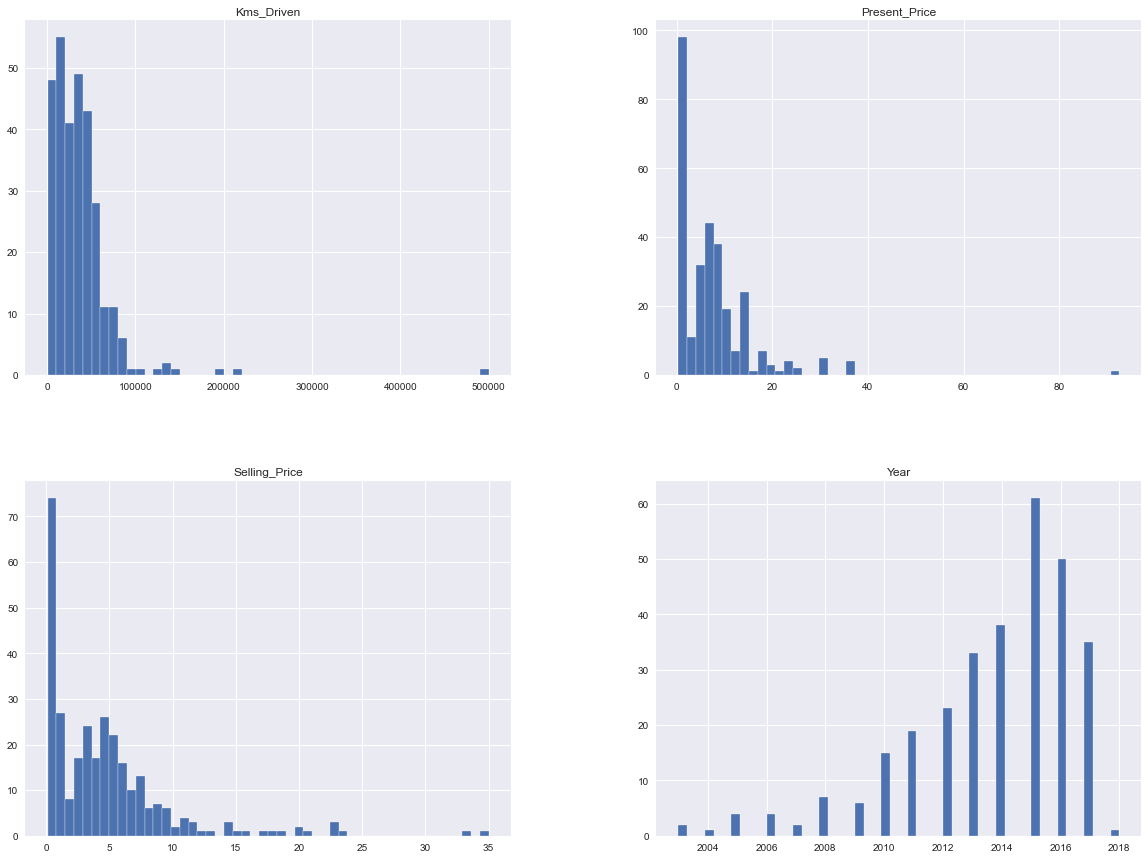

In [442]:
atttibutes_hist = df[["Kms_Driven", "Present_Price", "Selling_Price", "Year"]].hist(bins=50, figsize=(20,15))
atttibutes_hist

#### let's look at the categorial attributes histograma (as pies):


Text(0.5, 1.0, 'number of Past Owners:')

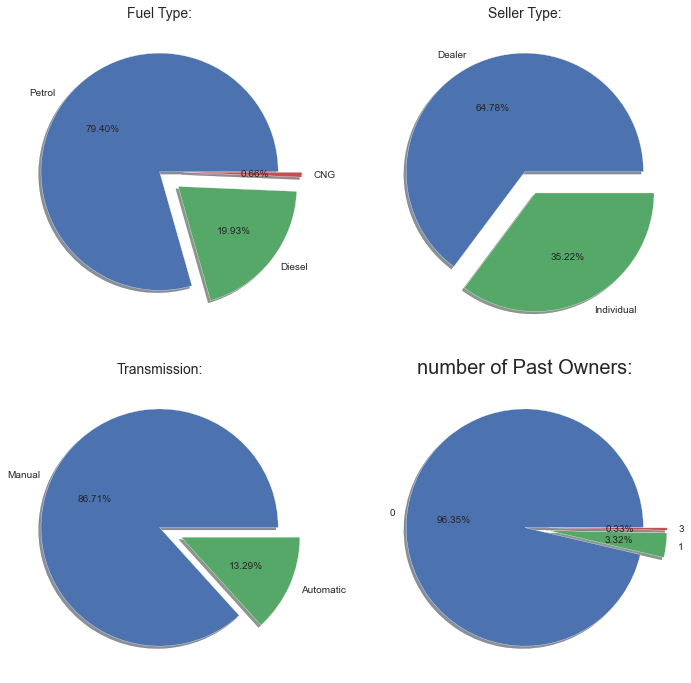

In [443]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = df['Fuel_Type'].value_counts().index.tolist()
values = df['Fuel_Type'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2, 0.2])
ax1.set_title("Fuel Type:", fontdict={'fontsize': 14})

labels = df['Seller_Type'].value_counts().index.tolist()[:2]
values = df['Seller_Type'].value_counts().tolist()[:2]
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Seller Type:", fontdict={'fontsize': 14})

labels = df['Transmission'].value_counts().index.tolist()[:2]
values = df['Transmission'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax3.set_title("Transmission:", fontdict={'fontsize': 14})

labels = df['Past_Owners'].value_counts().index.tolist()
values = df['Past_Owners'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2, 0.2])
ax4.set_title("number of Past Owners:", fontdict={'fontsize': 20})


# <ins> C. Clean and prepare the data </ins>  

### - Unique values
#### as we can see, in the 'Fuel type' attribute, there is only 2 observation that is uniqe. because it's just one I will remove this observation.

In [444]:
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [445]:
df = df[df['Fuel_Type'] != "CNG"]
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
Name: Fuel_Type, dtype: int64


## - Handeling text and categorial attributes

#### first of all, I will use "get_dummies" function to "convert" every categorial attribute.

In [446]:
df_copy = df.copy() # save for later use
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,1,1,0,0,1
298,city,2009,3.35,11.00,87934,0,0,1,1,0,0,1
299,city,2017,11.50,12.50,9000,0,1,0,1,0,0,1


#### The year coulmn is not generalize, so I will generate it to Age. this is a better information.

In [447]:
df['Car_Age']= 2018-df['Year'] # the dataset is from 2018

#### I will drop the names and year columns.
It is true that in theory the names can give us a good information, but we have only 300 rows and 98 uniqe names, so, not in this case.

In [448]:
df.drop(columns=['Car_Name'], inplace=True)
df.drop(columns=['Year'], inplace=True)

In [449]:
df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,3.35,5.59,27000,0,0,1,1,0,0,1,4
1,4.75,9.54,43000,0,1,0,1,0,0,1,5
2,7.25,9.85,6900,0,0,1,1,0,0,1,1


In [450]:
pd.DataFrame(data={'features': df.columns})

,features
0,Selling_Price
1,Present_Price
2,Kms_Driven
3,Past_Owners
4,Fuel_Type_Diesel
5,Fuel_Type_Petrol
6,Seller_Type_Dealer
7,Seller_Type_Individual
8,Transmission_Automatic
9,Transmission_Manual


# <ins>D. Dig into the DATA - correlations and patterns</ins>

## Let's try so uncover some patterns.

#### although linear correlations are not the only correlations we can find, it can gives us a good start. I will use Pearson’s correlation coefficient in the next matrixes.

### Correlation Matrix:

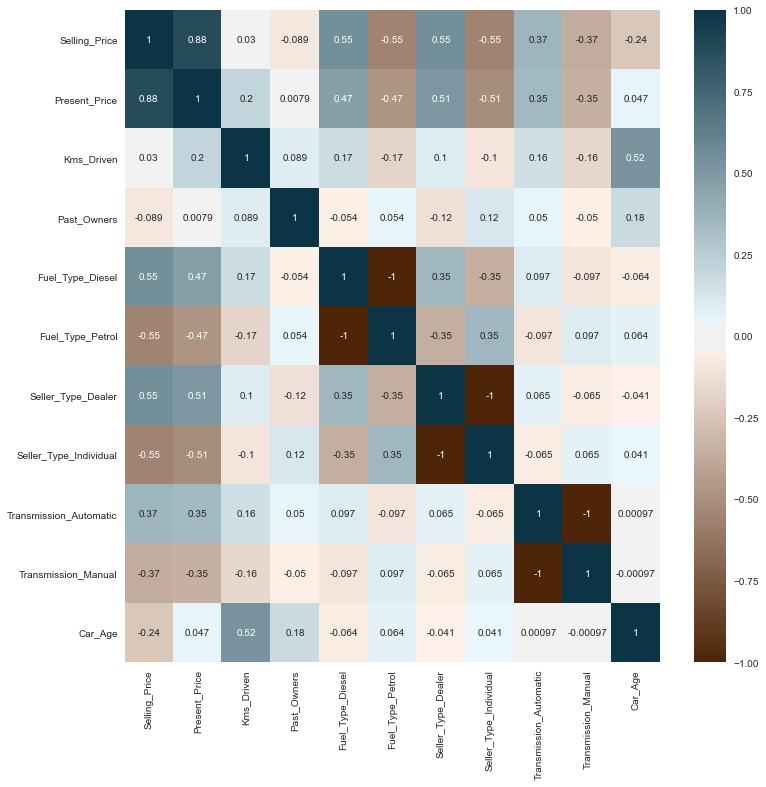

In [369]:
cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

#### high correlations with selling price:

In [370]:
corr_matrix = df.corr()
corralations = corr_matrix['Selling_Price'].sort_values(ascending = False) 
high_corr = (corralations > 0.2)|(corralations < -0.2)
pd.DataFrame(corralations[high_corr])
corralations[high_corr].index

Index(['Selling_Price', 'Present_Price', 'Seller_Type_Dealer',
       'Fuel_Type_Diesel', 'Transmission_Automatic', 'Car_Age',
       'Transmission_Manual', 'Fuel_Type_Petrol', 'Seller_Type_Individual'],
      dtype='object')

heatmap of the high correlations with Selling Price:


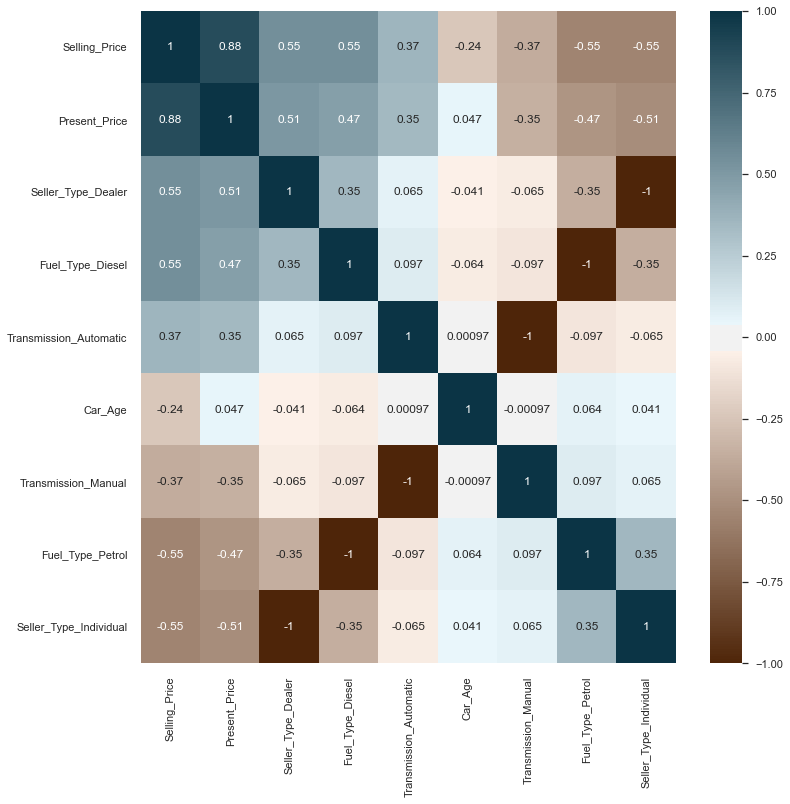

In [371]:
print("heatmap of the high correlations with Selling Price:")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[corralations[high_corr].index].corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

### categ features correlations:

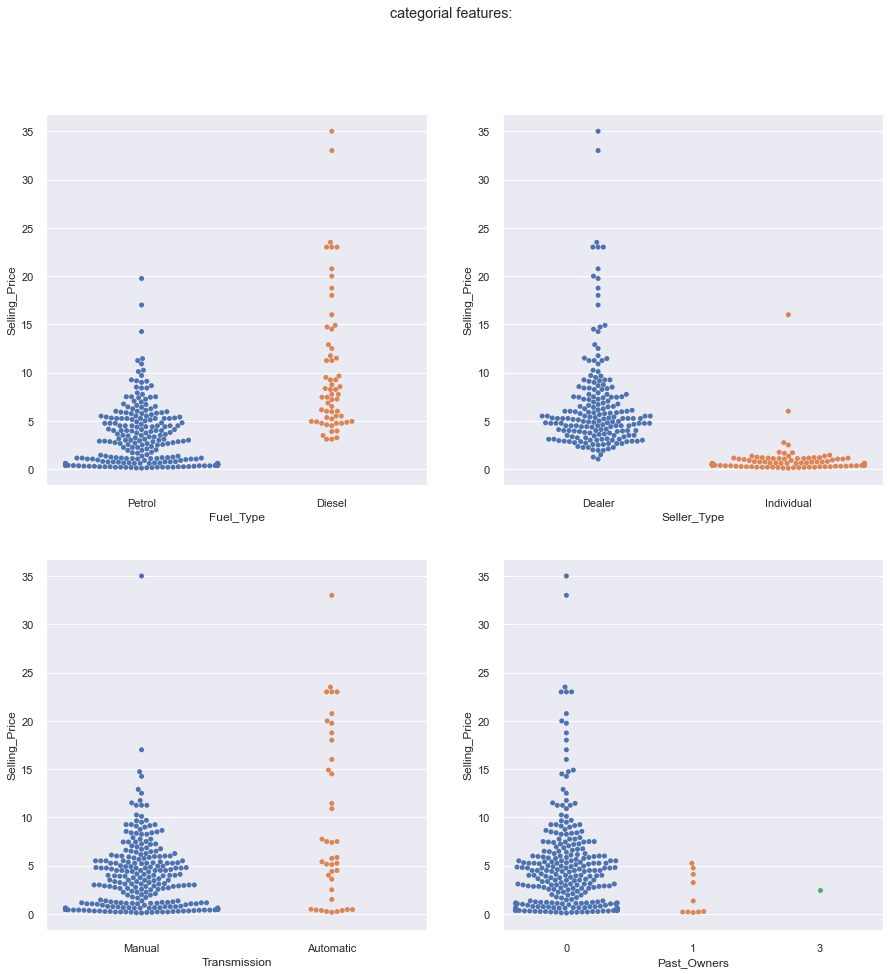

In [372]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('categorial features:')

sns.swarmplot(ax=axes[0,0], x="Fuel_Type", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[0,1], x="Seller_Type", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[1,0], x="Transmission", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[1,1], x="Past_Owners", y="Selling_Price", data=df_copy)

### numerical features correlations:

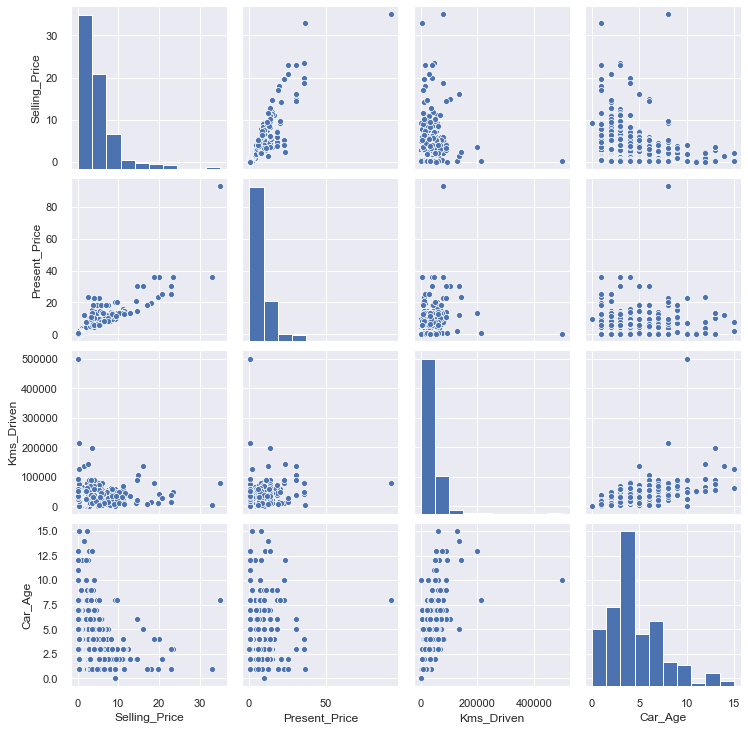

In [373]:
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']])

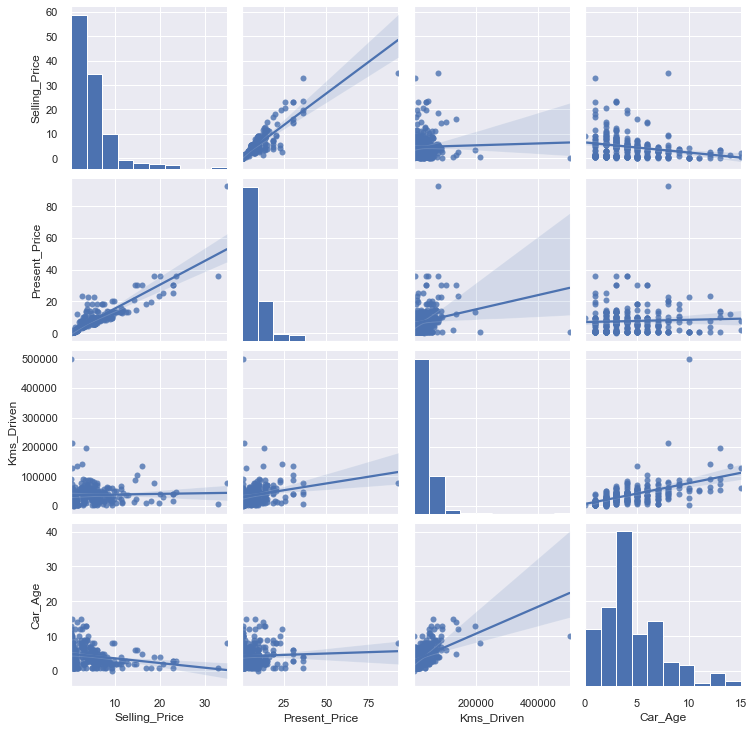

In [374]:
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']], kind='reg')

Text(0.5, 1.0, 'Selling Price range by Car Age')

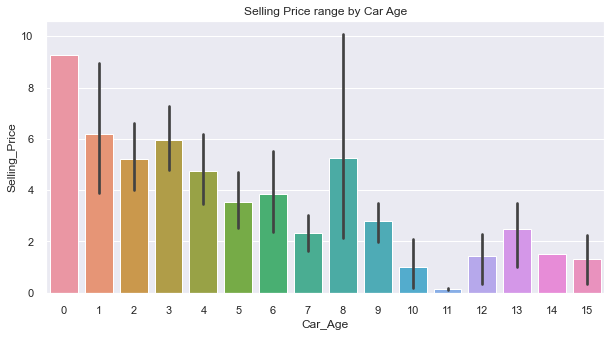

In [375]:
fig = plt.figure(figsize=(10,5))
sns.barplot('Car_Age','Selling_Price',data=df).set_title('Selling Price range by Car Age')

# <ins> E. Select a Performance Measure </ins>

 The coefficient of determination, R2 ("R squared"), is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

( source - https://en.wikipedia.org/wiki/Coefficient_of_determination )

# <ins> F. Test Set and Train Test </ins>

In [451]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Selling_Price'])
Y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [378]:
### scaling the numerical features with StandardScaler function.

In [462]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

X_train_stansadized = X_train.copy()
X_test_stansadized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()


numerical_features = ['Present_Price', 'Kms_Driven', 'Past_Owners', 'Car_Age']

# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_stansadized[numerical_features] = scaler_standard.transform(X_train_stansadized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_stansadized[numerical_features] = scaler_standard.transform(X_test_stansadized[numerical_features])

# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])


In [465]:
print('note: the mean is 0 and std is 1')
X_train_stansadized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Present_Price,Kms_Driven,Past_Owners,Car_Age
mean,1.347133e-16,-1.021963e-16,2.531680e-17,1.309970e-16
std,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00


In [466]:
print('note: the min is 0 and max is 1')
indexes = [False, False, False, True, False, False, False, True]
X_train_normalized.describe()[numerical_features].iloc[indexes]

note: the min is 0 and max is 1


,Present_Price,Kms_Driven,Past_Owners,Car_Age
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


### Now we have scaled test set and train set, we can continue to find a good model!
<br> <br>

### dummy model:

# <ins> G. Linear-Regression Model </ins>

In [475]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
LR = LinearRegression()
scores_standardized = cross_val_score(LR, X_train_stansadized, y_train, cv=kf)
scores_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)

#### standadized train set cross validation:

In [476]:

print("the scores of cross validation are:")
print(scores_standardized)
print()
print("mean R2 is: " + str(scores_standardized.mean())[:5] + " with std of  " + str(scores_standardized.std())[:5])

the scores of cross validation are:
[0.7938076  0.88614507 0.85366127 0.86552752 0.84833751 0.9276561
 0.9220863  0.88755663 0.56781578 0.59898794]

mean R2 is: 0.815 with std of  0.121


#### normalized train set cross validation:

In [477]:

print("the scores of cross validation are:")
print(scores_normalized)
print()
print("mean R2 is: " + str(scores_normalized.mean())[:5] + " with std of  " + str(scores_normalized.std())[:5])

the scores of cross validation are:
[0.7938076  0.88614507 0.85366127 0.86552752 0.84833751 0.9276561
 0.9220863  0.88755663 0.56781578 0.59898794]

mean R2 is: 0.815 with std of  0.121


- this is not bad, but I think that I can improve that with a little effort:

### I will make more featurs to use the data better:

In [383]:
# create 3 more features:
df['KMs_Per_year'] = df['Kms_Driven']/df['Car_Age']
df['Present_Price_Age_ratio'] = df['Present_Price']/df['Car_Age']
df['Present_Price_KMs_ratio'] = df['Present_Price']/df['Kms_Driven']
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age,KMs_Per_year,Present_Price_Age_ratio,Present_Price_KMs_ratio
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,299.000000,299.000000
mean,4.671739,7.636589,36908.397993,0.043478,0.200669,0.799331,0.645485,0.354515,0.133779,0.866221,4.367893,inf,inf,0.000356
std,5.098210,8.671821,39009.724028,0.248720,0.401172,0.401172,0.479168,0.479168,0.340986,0.340986,2.896151,NaN,NaN,0.000591
min,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.900000e+02,0.043846,0.000001
25%,0.850000,1.200000,15000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.750000e+03,0.490000,0.000086
50%,3.650000,6.400000,32000.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,8.333333e+03,1.600000,0.000194
75%,6.000000,9.900000,48383.500000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,1.183333e+04,3.133333,0.000353
max,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,inf,inf,0.006038


In [394]:
corr_matrix = df.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price              1.000000
Present_Price              0.879131
Present_Price_Age_ratio    0.854678
Seller_Type_Dealer         0.553425
Fuel_Type_Diesel           0.551948
Present_Price_KMs_ratio    0.548595
Transmission_Automatic     0.366627
KMs_Per_year               0.314043
Kms_Driven                 0.029546
Past_Owners               -0.088741
Car_Age                   -0.236047
Transmission_Manual       -0.366627
Fuel_Type_Petrol          -0.551948
Seller_Type_Individual    -0.553425
Name: Selling_Price, dtype: float64

- Present_Price_Age_ratio is very significant
- Present_Price_KMs_ratio more significant than KMS alone
- KMs_Per_year is more significant than KMS ang Car Age separately

I will repeat the previous steps. note that the set and train set will not change because Im using the Kfold function.

### creating and scaling the new numerical features with StandardScaler function:

In [390]:
X_train_scaled['KMs_Per_year'] = X_train_scaled['Kms_Driven']/X_train_scaled['Car_Age']
X_train_scaled['Present_Price_Age_ratio'] = X_train_scaled['Present_Price']/X_train_scaled['Car_Age']
X_train_scaled['Present_Price_KMs_ratio'] = X_train_scaled['Present_Price']/X_train_scaled['Kms_Driven']

X_test_scaled['KMs_Per_year'] = X_test_scaled['Kms_Driven']/X_test_scaled['Car_Age']
X_test_scaled['Present_Price_Age_ratio'] = X_test_scaled['Present_Price']/X_test_scaled['Car_Age']
X_test_scaled['Present_Price_KMs_ratio'] = X_test_scaled['Present_Price']/X_test_scaled['Kms_Driven']

# new_numerical_features = ['KMs_Per_year', 'Present_Price_Age_ratio', 'Present_Price_KMs_ratio']
# scaler.fit(X_train_scaled[new_numerical_features])
# X_train_scaled[new_numerical_features] = scaler.transform(X_train_scaled[new_numerical_features])

# # the scaling is with the the same fitted scaler (by the train data)
# X_test_scaled[new_numerical_features] = scaler.transform(X_test_scaled[new_numerical_features])


In [391]:

scores = cross_val_score(LR, X_train_scaled, y_train, cv=kf)
print(scores.mean())
print(scores.std())



0.8423747147995849
0.09392373846382972


## feture selection:

In [431]:
# copy X with columns wich grater than limit:
def copy_by_corr_limit(X, lim, limits):
    X_copy = X.copy()
    s = (limits < lim)
    X_copy = X_copy[X_copy.columns[~s]]
    return X_copy

In [429]:
print('correlations (without the sign+-):')
correlations = abs(corr_matrix['Selling_Price']).sort_values(ascending=False)
correlations.drop('Selling_Price', inplace=True)
correlations

correlations (without the sign+-):


Present_Price              0.879131
Present_Price_Age_ratio    0.854678
Seller_Type_Individual     0.553425
Seller_Type_Dealer         0.553425
Fuel_Type_Diesel           0.551948
Fuel_Type_Petrol           0.551948
Present_Price_KMs_ratio    0.548595
Transmission_Automatic     0.366627
Transmission_Manual        0.366627
KMs_Per_year               0.314043
Car_Age                    0.236047
Past_Owners                0.088741
Kms_Driven                 0.029546
Name: Selling_Price, dtype: float64

In [436]:
corr_limits = [0, 0.03, 0.09, 0.25, 0.35, 0.40, 0.55, 0.552, 0.555, 0.86]

mean_scores = []
for limit in corr_limits:
    X_train_copy = copy_by_corr_limit(X_train_scaled, limit, correlations)
    R2 = precision = cross_val_score(LR, X_train_copy, y_train, cv=kf).mean()
    mean_scores.append(R2)
    
pd.DataFrame(data={'lim correlation:':corr_limits, 'R2': mean_scores}) 

,lim correlation:,R2
0,0.000,0.842375
1,0.030,0.842910
2,0.090,0.814123
3,0.250,0.815158
4,0.350,0.807739
5,0.400,0.809027
6,0.550,0.809027
7,0.552,0.809479
8,0.555,0.785285
9,0.860,0.708101
